/tmp/ipykernel_4442/2011880746.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_4442/2011880746.py:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_4442/2011880746.py:29: DeprecationWa

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z shape (707, 1179) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z min, Z max nan nan
lat shape, lon shape (707,) (1179,)
Z shape (707, 1179) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_35 shape (707, 1179)
Z_40 shape (707, 1179)
lats shape, lons shape (707, 1179) (707, 1179) [[26.83631678 26.83631678 26.83631678 ... 26.83631678 26.83631678
  26.83631678]
 [26.84381347 26.84381347 26.84381347 ... 26.84381347 26.84381347
  26.84381347]
 [26.85131016 26.85131016 26.85131016 ... 26.85131016 26.85131016
  26.85131016]
 ...
 [32.11398386 32.11398386 32.11398386 ... 32.11398386 32.11398386
  32.11398386]
 [32.12148055 32.12148055 32.12148055 ... 32.12

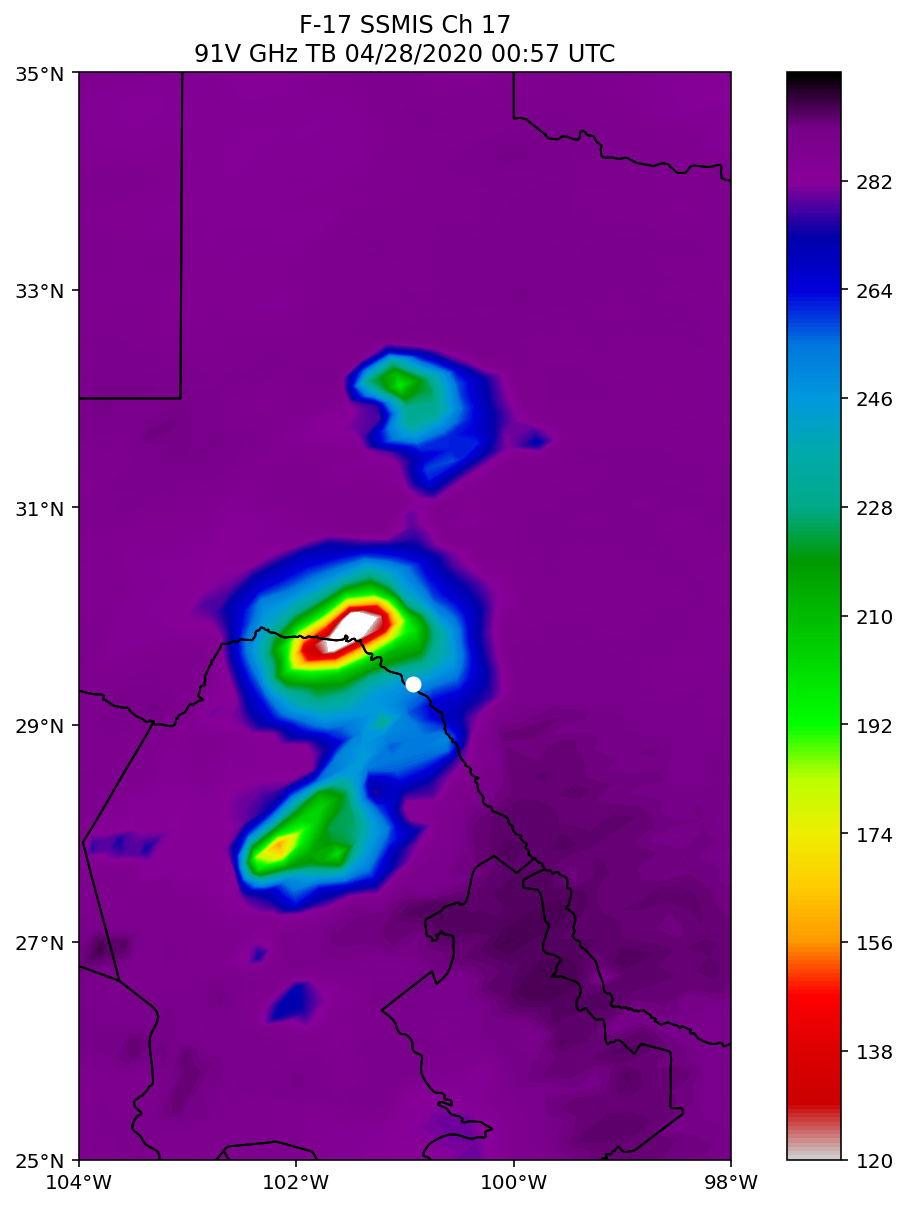

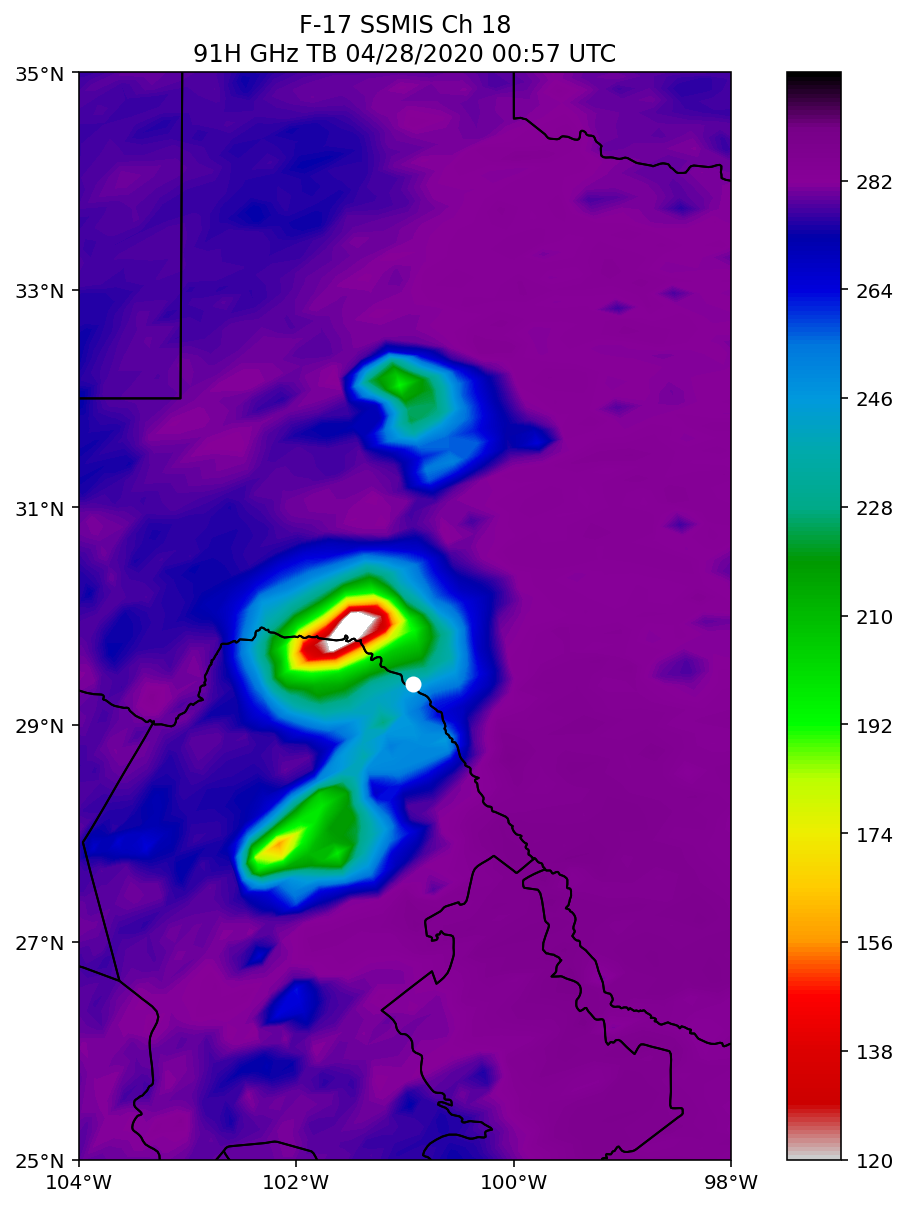

/usr/local/lib/python3.8/dist-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'latlon'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


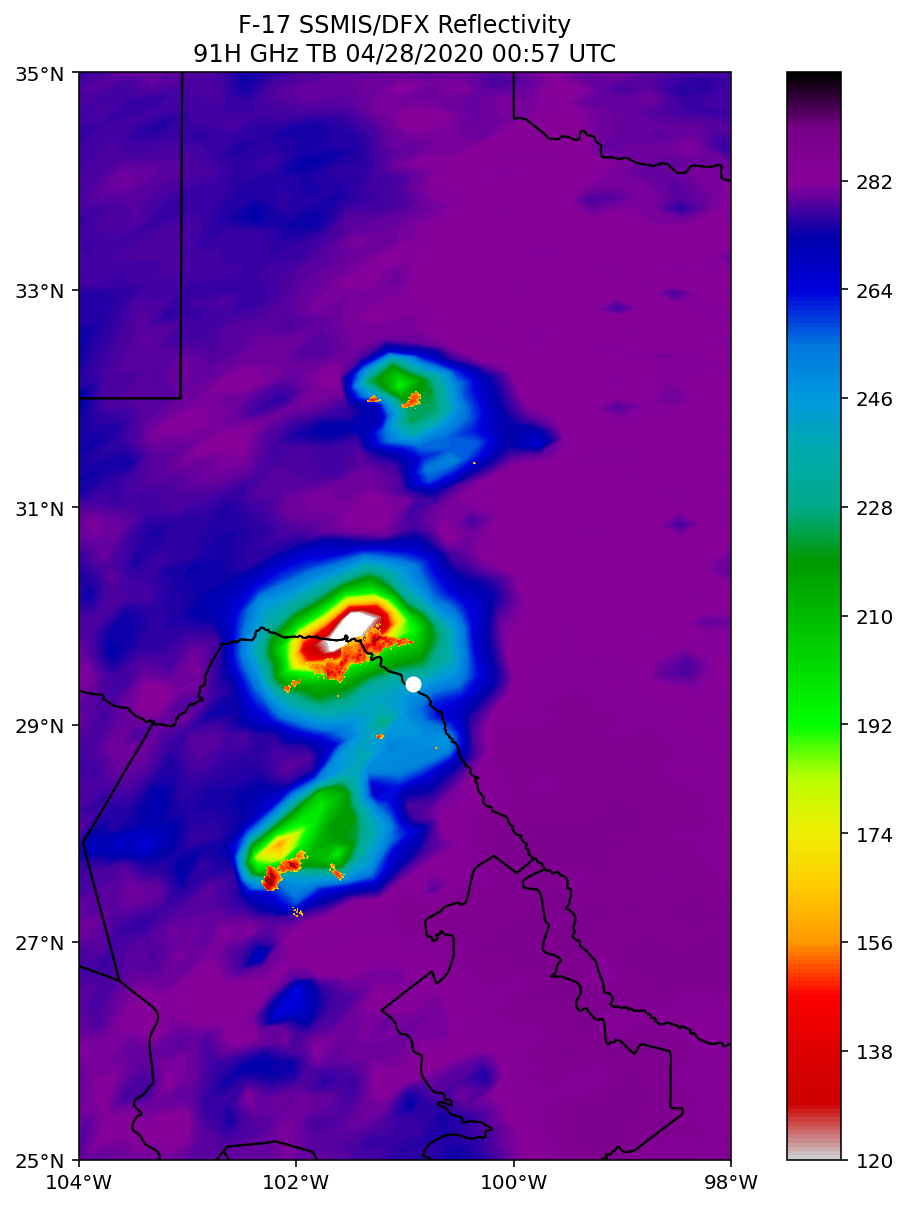

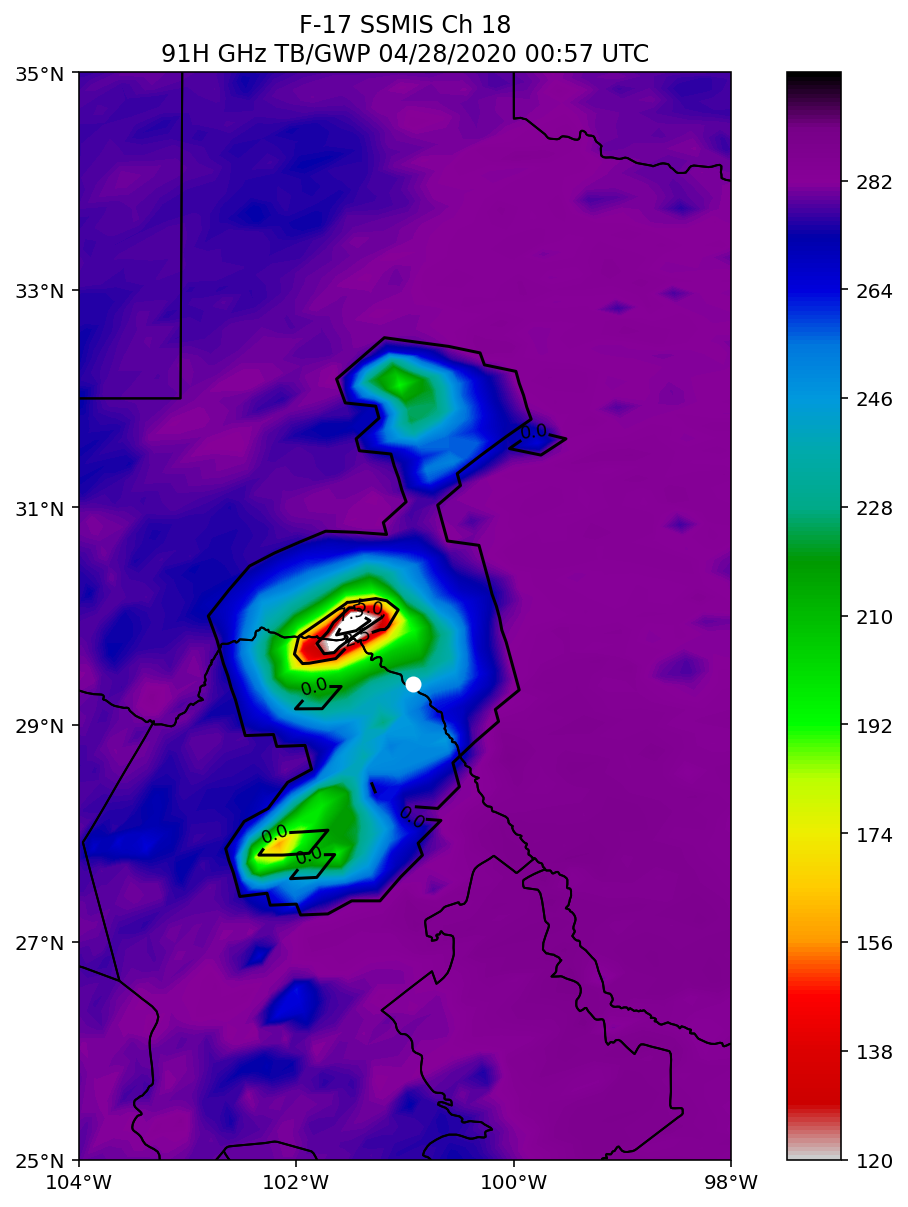

In [2]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above
    freq = nc_fid.variables["Freq"][:]
    gwp = nc_fid.variables["GWP"][:]
    lats = nc_fid.variables['Latitude'][:]  # extract/copy the data
    lons = nc_fid.variables['Longitude'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB, freq, gwp, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file = 'KDFX_V06_20200428_005512.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_35 = ma.masked_where(Z < 35, Z)
print('Z_35 shape', Z_35.shape)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)

SSMIS_file = 'NPR-MIRS-IMG_v11r2_f17_s202004280049000_e202004280233000_c202004280342280.nc'
TB, freq, gwp, lats, lons, names = read_SSMIS_plot(SSMIS_file)
print("Frequency: ", freq)
TB91V = TB[130:250,:,16]
TB91H = TB[130:250,:,17]
gwp = gwp[130:250,:]
lats = lats[130:250,:]
lons = lons[130:250,:]
TB91V_mn = np.mean(TB91V)
TB91H_mn = np.mean(TB91H)
gwp_mn = np.mean(gwp)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("TB91V mean = ", TB91V_mn)
print("TB91H mean = ", TB91H_mn)
print("GWP mean = ", gwp_mn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB91V_max = np.amax(TB91V)
TB91V_min = np.amin(TB91V)
TB91H_max = np.amax(TB91H)
TB91H_min = np.amin(TB91H)
gwp_min = np.amin(gwp)
gwp_max = np.amax(gwp)
print("TB91V max =", TB91V_max)
print("TB91V min =", TB91V_min)
print("TB91V = ", TB91V, TB91V.shape)
print("TB91H max =", TB91H_max)
print("TB91H min =", TB91H_min)
print("TB91H = ", TB91H, TB91H.shape)
print("GWP max =", gwp_max)
print("GWP min =", gwp_min)
print("GWP = ", gwp, gwp.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))

plt.title('F-17 SSMIS Ch 17\n'
          '91V GHz TB 04/28/2020 00:57 UTC')
levels = np.arange(120,300,0.1)
mi = ax.contourf(lons, lats, TB91V, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_TB91V_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))

plt.title('F-17 SSMIS Ch 18\n'
          '91H GHz TB 04/28/2020 00:57 UTC')
levels = np.arange(120,300,0.1)
mi = ax.contourf(lons, lats, TB91H, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_TB91H_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))

plt.title('F-17 SSMIS/DFX Reflectivity\n'
          '91H GHz TB 04/28/2020 00:57 UTC')
levels = np.arange(120,300,0.1)
mi = ax.contourf(lons, lats, TB91H, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz,latz,Z_40,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_TB91H_Z40_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))

plt.title('F-17 SSMIS Ch 18\n'
          '91H GHz TB/GWP 04/28/2020 00:57 UTC')
levels = np.arange(120,300,0.1)
mi = ax.contourf(lons, lats, TB91H, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,10,2.5)
cl = ax.contour(lons,lats,gwp,clevels,colors='k',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_TB91H_GWP_0057.png",dpi=250,bbox_inches='tight')
plt.show()


BTDR mean =  0.19758153571628517
BTDR max = 1.1109464534779994
BTDR min = -0.1471700005700689
BTDR =  [[0.06706564940484427 0.060366726651676285 0.04370520625359743 ...
  0.43789131487159877 0.40285328738281695 0.40721059693093564]
 [0.0715568281450963 0.04353623378854859 0.024848243670728305 ...
  0.48542397504257145 0.4111587744817174 0.4111574715395264]
 [0.031060826108268616 0.08389016059737642 0.06190099954236381 ...
  0.5010152912656409 0.4026987022872585 0.4093307973578631]
 ...
 [0.26090523779321717 0.23296636979335483 0.27083329737158807 ...
  0.11736527332639199 0.0880877101232224 0.08053737150578608]
 [0.19181500498052007 0.24920730461127483 0.26294187975338135 ...
  0.10417014150672049 0.08845407227904085 0.09459250325032625]
 [0.19706631342562506 0.2531568316101245 0.2568858699156714 ...
  0.0694167006186408 0.07877253382444982 0.06670614682444398]] (120, 90)
PCT mean =  289.0868744388889
PCT max = 313.8301
PCT min = 89.94058
PCT =  [[271.57198 273.99932 270.85042 ... 292.

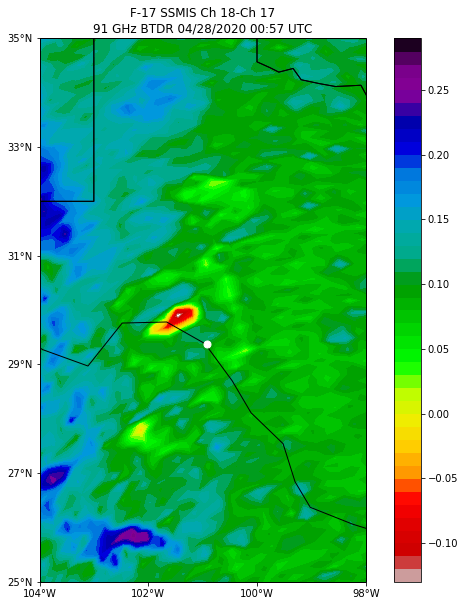

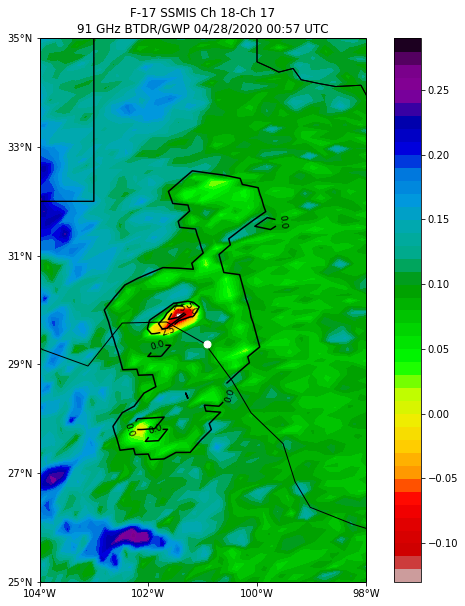

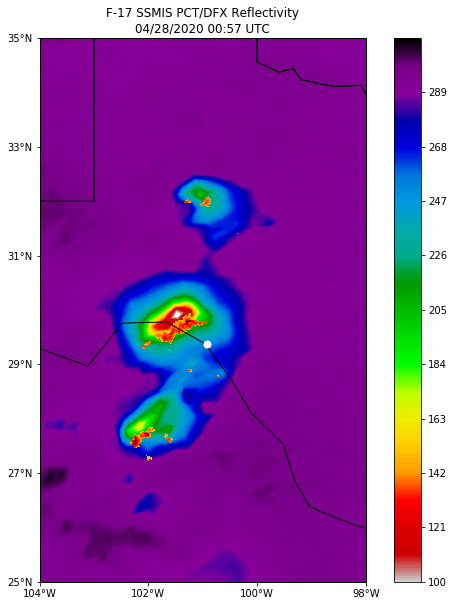

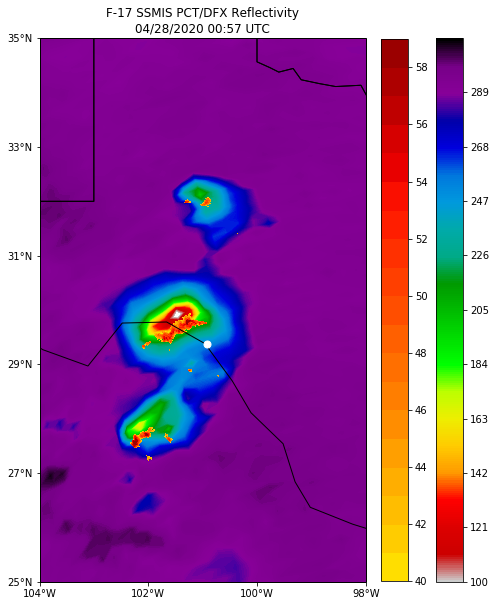

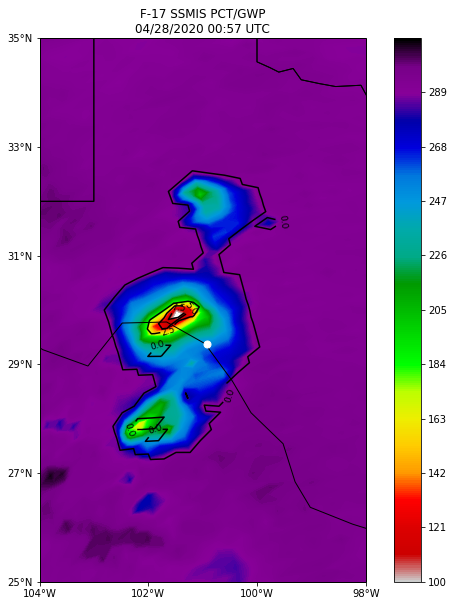

In [7]:
BTDR = 10*(np.log10(TB91V/TB91H))
BTDRmn = np.mean(BTDR)
print("BTDR mean = ", BTDRmn)
BTDR_max = np.amax(BTDR)
BTDR_min = np.amin(BTDR)
print("BTDR max =", BTDR_max)
print("BTDR min =", BTDR_min)
print("BTDR = ", BTDR, BTDR.shape)

PCT = (1.818*TB91V)-(0.818*TB91H)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('F-17 SSMIS Ch 18-Ch 17\n'
          '91 GHz BTDR 04/28/2020 00:57 UTC')
levels = np.arange(-0.13,0.3,0.01)
mi = ax.contourf(lons, lats, BTDR, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_BTDR_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('F-17 SSMIS Ch 18-Ch 17\n'
          '91 GHz BTDR/GWP 04/28/2020 00:57 UTC')
levels = np.arange(-0.13,0.3,0.01)
mi = ax.contourf(lons, lats, BTDR, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,10,2.5)
cl = ax.contour(lons,lats,gwp,clevels,colors='k',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_BTDR_GWP_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('F-17 SSMIS PCT/DFX Reflectivity\n'
          '04/28/2020 00:57 UTC')
levels = np.arange(100,310,0.1)
mi = ax.contourf(lons, lats, PCT, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz,latz,Z_40,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_PCT_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('F-17 SSMIS PCT/DFX Reflectivity\n'
          '04/28/2020 00:57 UTC')
levels = np.arange(100,310,0.1)
mi = ax.contourf(lons, lats, PCT, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz,latz,Z_40,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.05,pad=0.05)
cbar2=plt.colorbar(cZ,fraction=0.054,pad=0.03)
plt.savefig("ssmis_PCT_Z_0057.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('F-17 SSMIS PCT/GWP\n'
          '04/28/2020 00:57 UTC')

levels = np.arange(100,310,0.1)
mi = ax.contourf(lons, lats, PCT, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,10,2.5)
cl = ax.contour(lons,lats,gwp,clevels,colors='k',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("ssmis_PCT_GWP_0057.png",dpi=250,bbox_inches='tight')
plt.show()

[u'Reflectivity', u'lat', u'lon', u'time']
Z shape (412, 688) [[18.5  nan  nan ...  nan  nan  nan]
 [12.5  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
Z min, Z max nan nan
lat shape, lon shape (412,) (688,)
Z shape (412, 688) [[18.5  nan  nan ...  nan  nan  nan]
 [12.5  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]
Z_35 shape (412, 688)
Z_40 shape (412, 688)
lats shape, lons shape (412, 688) (412, 688) [[27.70509979 27.70509979 27.70509979 ... 27.70509979 27.70509979
  27.70509979]
 [27.71262603 27.71262603 27.71262603 ... 27.71262603 27.71262603
  27.71262603]
 [27.72015226 27.72015226 27.72015226 ... 27.72015226 27.72015226
  27.72015226]
 ...
 [30.78333076 30.78333076 30.78333076 ... 30.78333076 30.78333076
  30

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in less
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less


TB15 mean =  258.6066319444444
TB16 mean =  261.0747263888889
CLW mean =  -7.156002777777778
GWP mean =  0.01597916666666667
Lats mean=  31.589746
Lons mean=  -91.22356
TB15 max = 288.97
TB15 min = 196.19
TB15 =  [[281.7 281.7 279.47 ... 247.45000000000002 237.62 237.62]
 [280.37 280.37 278.97 ... 247.33 237.46 237.46]
 [279.05 277.68 278.48 ... 247.21 237.31 237.31]
 ...
 [275.18 275.18 275.92 ... 267.91 268.03000000000003 268.03000000000003]
 [275.21 275.21 276.0 ... 267.62 267.81 267.81]
 [274.92 274.92 275.71 ... 266.98 267.06 267.06]] (80, 90)
TB16 max = 290.21
TB16 min = 144.31
TB16 =  [[269.64 276.48 284.46 ... 234.28 231.78 233.63]
 [257.74 275.75 285.45 ... 232.33 232.77 233.16]
 [261.6 280.21 286.35 ... 232.77 234.33 234.39000000000001]
 ...
 [274.44 275.90000000000003 277.35 ... 268.82 268.26 269.68]
 [273.48 276.64 278.32 ... 268.63 267.76 269.32]
 [273.56 275.87 276.43 ... 267.99 268.76 268.88]] (80, 90)
CLW max = 0.07
CLW min = -9.99
CLW =  [[-9.99 -9.99 -9.99 ...  0.    

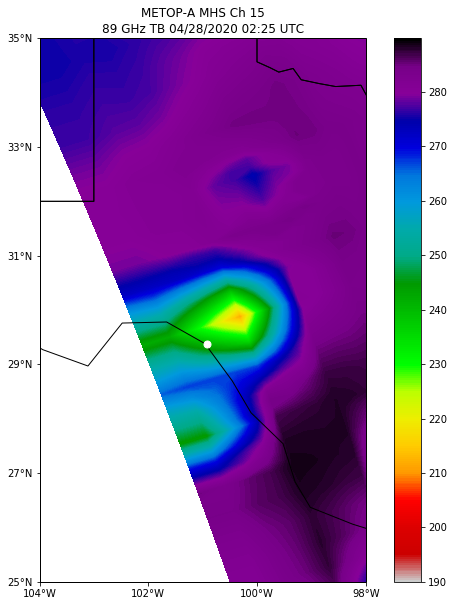

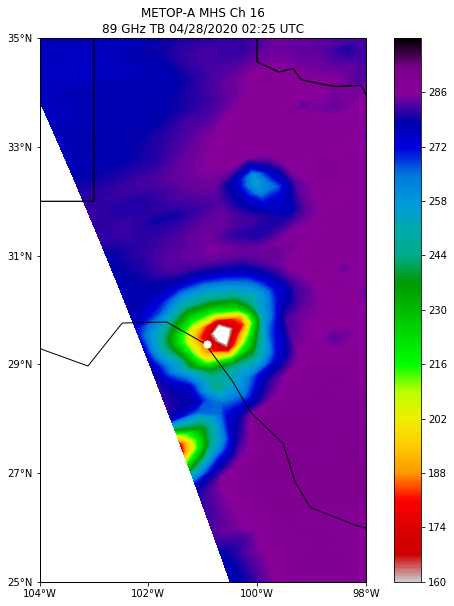

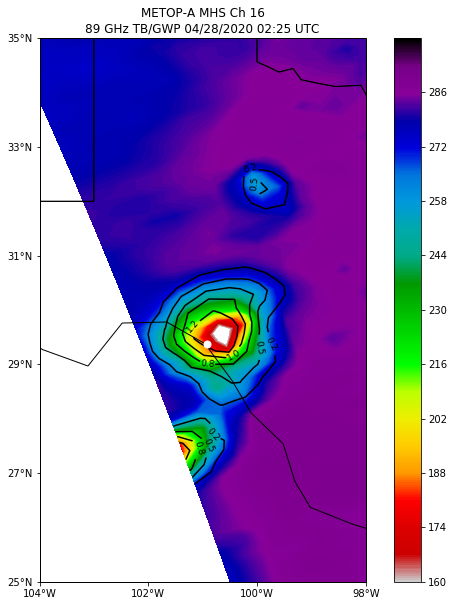

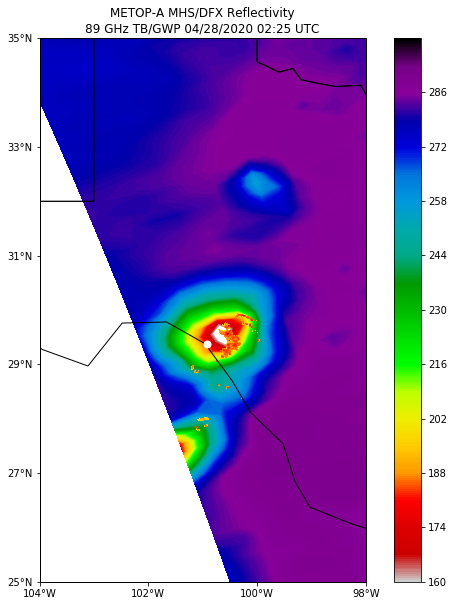

In [2]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above
    freq = nc_fid.variables["Freq"][:]
    clw = nc_fid.variables["CLW"][:]
    gwp = nc_fid.variables["GWP"][:]
    lats = nc_fid.variables['Latitude'][:]  # extract/copy the data
    lons = nc_fid.variables['Longitude'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB, freq, clw, gwp, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file = 'KDFX_V06_20200428_022459.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_35 = ma.masked_where(Z < 35, Z)
print('Z_35 shape', Z_35.shape)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)

MHS_file = 'NPR-MIRS-IMG_v11r2_ma2_s202004280103000_e202004280247000_c202004280344040.nc'
TB, freq, clw, gwp, lats, lons, names = read_MHS_plot(MHS_file)
print("Frequency: ", freq)
TB15 = TB[1870:1950,:,14]
TB16 = TB[1870:1950,:,15]
clw = clw[1870:1950,:]
gwp = gwp[1870:1950,:]
lats = lats[1870:1950,:]
lons = lons[1870:1950,:]
TB15_mn = np.mean(TB15)
TB16_mn = np.mean(TB16)
clw_mn = np.mean(clw)
gwp_mn = np.mean(gwp)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("TB15 mean = ", TB15_mn)
print("TB16 mean = ", TB16_mn)
print("CLW mean = ", clw_mn)
print("GWP mean = ", gwp_mn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB15_max = np.amax(TB15)
TB15_min = np.amin(TB15)
TB16_max = np.amax(TB16)
TB16_min = np.amin(TB16)
clw_min = np.amin(clw)
clw_max = np.amax(clw)
gwp_min = np.amin(gwp)
gwp_max = np.amax(gwp)
print("TB15 max =", TB15_max)
print("TB15 min =", TB15_min)
print("TB15 = ", TB15, TB15.shape)
print("TB16 max =", TB16_max)
print("TB16 min =", TB16_min)
print("TB16 = ", TB16, TB16.shape)
print("CLW max =", clw_max)
print("CLW min =", clw_min)
print("CLW = ", clw, clw.shape)
print("GWP max =", gwp_max)
print("GWP min =", gwp_min)
print("GWP = ", gwp, gwp.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('METOP-A MHS Ch 15\n'
          '89 GHz TB 04/28/2020 02:25 UTC')
levels = np.arange(190,290,0.1)
mi = ax.contourf(lons, lats, TB15, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("mhs_TB15_0225.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('METOP-A MHS Ch 16\n'
          '89 GHz TB 04/28/2020 02:25 UTC')
levels = np.arange(160,300,0.1)
mi = ax.contourf(lons, lats, TB16, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("mhs_TB16_0225.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('METOP-A MHS Ch 16\n'
          '89 GHz TB/GWP 04/28/2020 02:25 UTC')
levels = np.arange(160,300,0.1)
mi = ax.contourf(lons, lats, TB16, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,1.5,0.25)
cl = ax.contour(lons,lats,gwp,clevels,colors='k',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("mhs_TB16_GWP_0225.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-104, -98, 25, 35)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-104, -98, 25, 35], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('METOP-A MHS/DFX Reflectivity\n'
          '89 GHz TB/GWP 04/28/2020 02:25 UTC')
levels = np.arange(160,300,0.1)
mi = ax.contourf(lons, lats, TB16, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz,latz,Z_40,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.coastlines(resolution='50m', color='black', linewidth=1)

for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

ax.set_xticks([-104,-102,-100,-98])
ax.set_yticks([25,27,29,31,33,35])

ax.plot(-100.92361, 29.37472, 'wo', markersize=7, transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi)
plt.savefig("mhs_TB16_Z40_0225.png",dpi=250,bbox_inches='tight')
plt.show()